<a href="https://colab.research.google.com/github/AkarshBongarala/Projects/blob/main/Canny_and_watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow



Sobel and Canny method

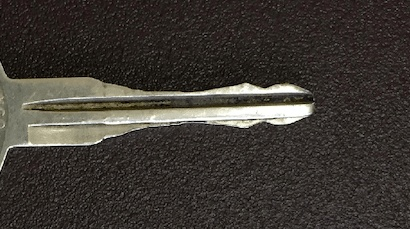

-1

In [2]:
image = cv2.imread('/content/key11.jpg')
shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)

gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Display original image
cv2_imshow(image)
cv2.waitKey(0)



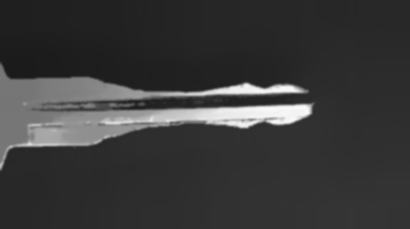

In [3]:
cv2_imshow(blurred)

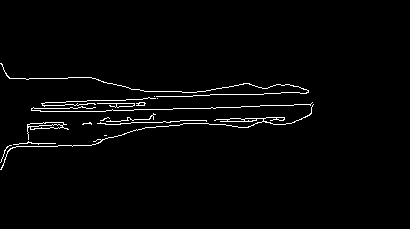

In [4]:
wide = cv2.Canny(blurred, 150, 30)
mid = cv2.Canny(blurred, 300, 50)
tight = cv2.Canny(blurred, 240, 50)
# show the output Canny edge maps
cv2_imshow(wide)

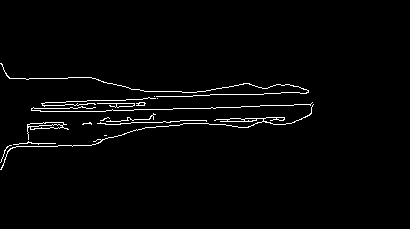

In [5]:
mid = cv2.Canny(blurred, 30, 150)
cv2_imshow(mid)


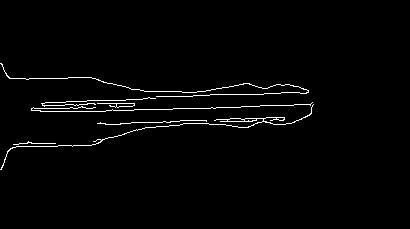

-1

In [6]:
cv2_imshow(tight)
cv2.waitKey(0)

Watershed method

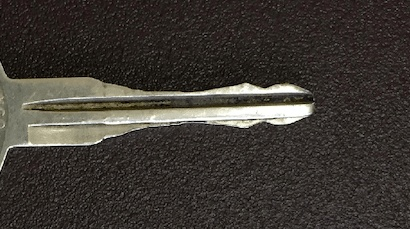

In [7]:
# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
image = cv2.imread('/content/key11.jpg')
cv2_imshow(image)

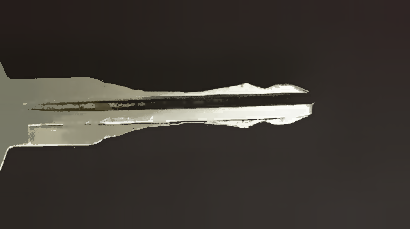

In [8]:
shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
cv2_imshow(shifted)

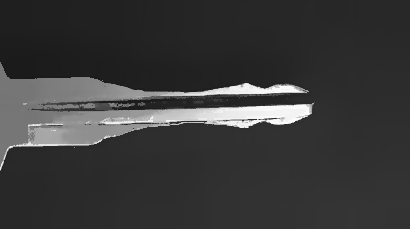

In [9]:
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


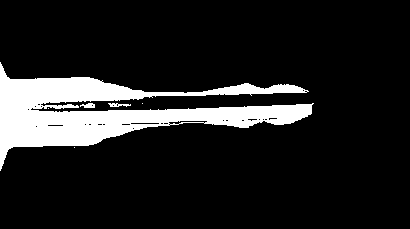

In [10]:
# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

In [11]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [12]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [13]:
markers = cv2.watershed(image,markers)
image[markers == -1] = [255,0,0]

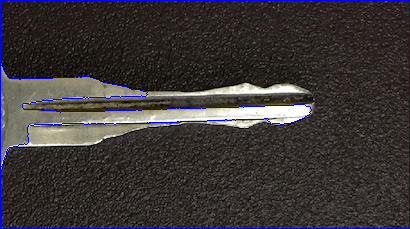

In [14]:
cv2_imshow(image)